In [ ]:
!pip install waii-sdk-py pandas

In [1]:
from waii_sdk_py import WAII
from waii_sdk_py.query import *

# follow the README.md instructions to get your API key
WAII.initialize(api_key='....') 

# show all the connections available
print([conn.key for conn in WAII.Database.get_connections().connectors])

# activate the connection you want to use, use one of the keys from the previous command
# This is optional if you only want to use our preloaded playground connection
WAII.Database.activate_connection('snowflake://...')

In [13]:
print(WAII.Query.generate(QueryGenerationRequest(ask = "give me most popular language for each country")).query)

WITH language_percentage AS (
    SELECT
        name AS country,
        language,
        SUM(percentage) AS total_percentage
    FROM waii.world.countrylanguage AS l
    INNER JOIN waii.world.country AS c
        ON countrycode = code
    GROUP BY
        name,
        language
)

SELECT
    country,
    language
FROM (
    SELECT
        country,
        language,
        ROW_NUMBER() OVER (PARTITION BY country ORDER BY total_percentage DESC) AS rn
    FROM language_percentage
)
WHERE
    rn = 1



In [4]:
df = WAII.Query.generate(QueryGenerationRequest(ask = "give me most popular language for each country")).run().to_pandas_df()
display(df)

,COUNTRY,LANGUAGE
0,Albania,Albaniana
1,Eritrea,Tigrinja
2,Tajikistan,Tadzhik
3,Russian Federation,Russian
4,Tokelau,English
...,...,...
228,Pitcairn,Pitcairnese
229,Azerbaijan,Azerbaijani
230,Congo,Kongo
231,Ireland,English


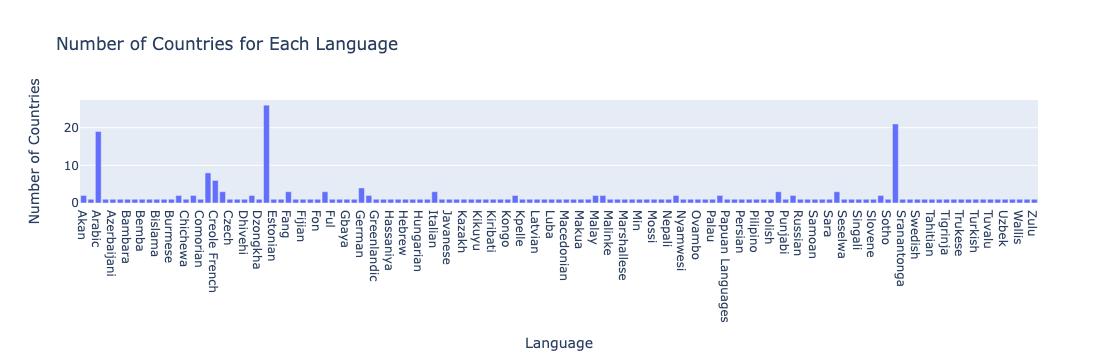

In [6]:
WAII.Query.plot(df, "plot number of countries for each language")

In [7]:
df = WAII.Query.generate(QueryGenerationRequest(ask = "Give me all cars, with their maker, country and continent")).run().to_pandas_df()
display(df)

,ID,MAKE,MAKER,COUNTRYNAME,CONTINENT
0,1,chevrolet chevelle malibu,General Motors,usa,america
1,2,buick skylark 320,General Motors,usa,america
2,3,plymouth satellite,Chrysler,usa,america
3,4,amc rebel sst,American Motor Company,usa,america
4,5,ford torino,Ford Motor Company,usa,america
...,...,...,...,...,...
399,402,ford mustang gl,Ford Motor Company,usa,america
400,403,vw pickup,Volkswagen,germany,europe
401,404,dodge rampage,Chrysler,usa,america
402,405,ford ranger,Ford Motor Company,usa,america


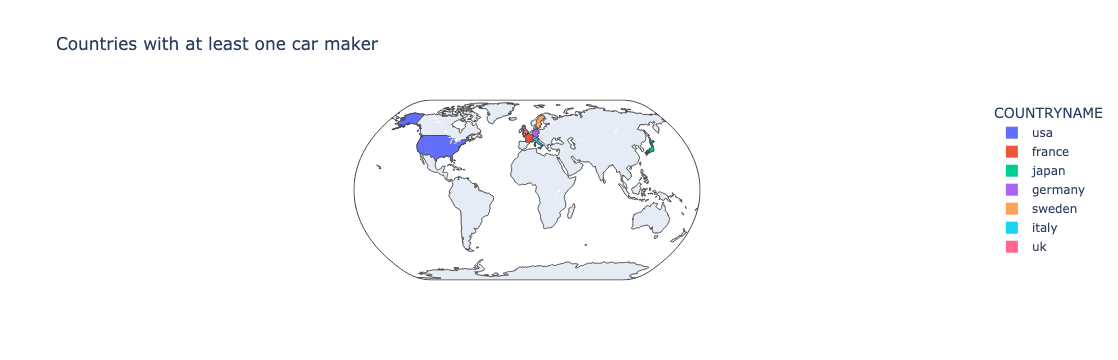

In [10]:
WAII.Query.plot(df, "use world map to show me all the countries which have at least one car maker")

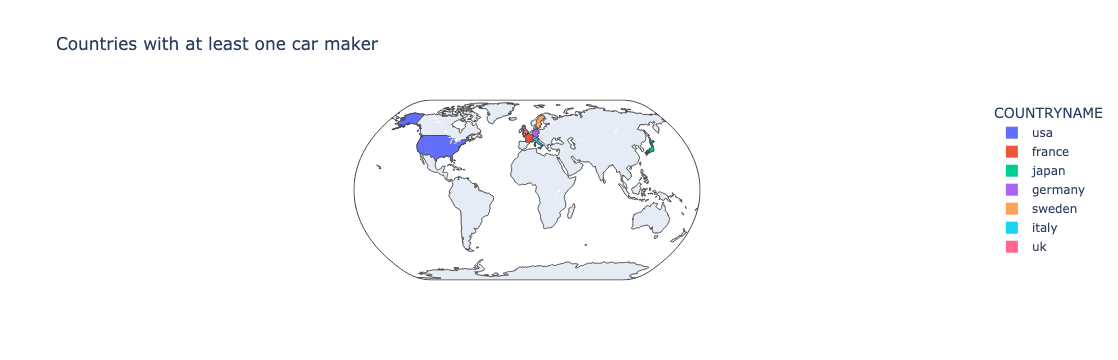

import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame and 'COUNTRYNAME' is the column with country names
df_unique_countries = df.drop_duplicates(subset=['COUNTRYNAME'])

fig = px.choropleth(df_unique_countries, locations='COUNTRYNAME',
                    locationmode='country names',
                    color='COUNTRYNAME',
                    title='Countries with at least one car maker',
                    hover_name='COUNTRYNAME',
                    projection='natural earth')

fig.show()


In [14]:
code = WAII.Query.plot(df, "use world map to show me all the countries which have at least one car maker", return_plot_script=True)
print(code)